# Exploratory Analysis

load necessary modules

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pickle
from histogram_window import histogram_windowing
from itertools import combinations
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
channel = ('Synap0','Synap1','VGlut10','VGlut11','VGlut2','Vglut3', 'psd','glur2','nmdar1','nr2b','gad','VGAT', 'PV',\
           'Gephyr','GABAR1','GABABR','CR1','5HT1A', 'NOS','TH','VACht','Synapo','tubuli','DAPI') 
channelType = ('ex_pre','ex_pre','ex_pre','ex_pre','ex_pre','in_pre_small', 'ex_post','ex_post','ex_post','ex_post',\
               'in_pre','in_pre', 'in_pre','in_post','in_post','in_post','in_pre_small','other', 'ex_post','other',\
               'other','ex_post','none','none')
channel2type = {channel[i]: channelType[i] for i in range(len(channel))}
type2channels = {chType: [channel[i] for i in range(len(channel)) if channelType[i] == chType] for chType in\
                 set(channelType)}

## Kernel Density Estimates

raw data

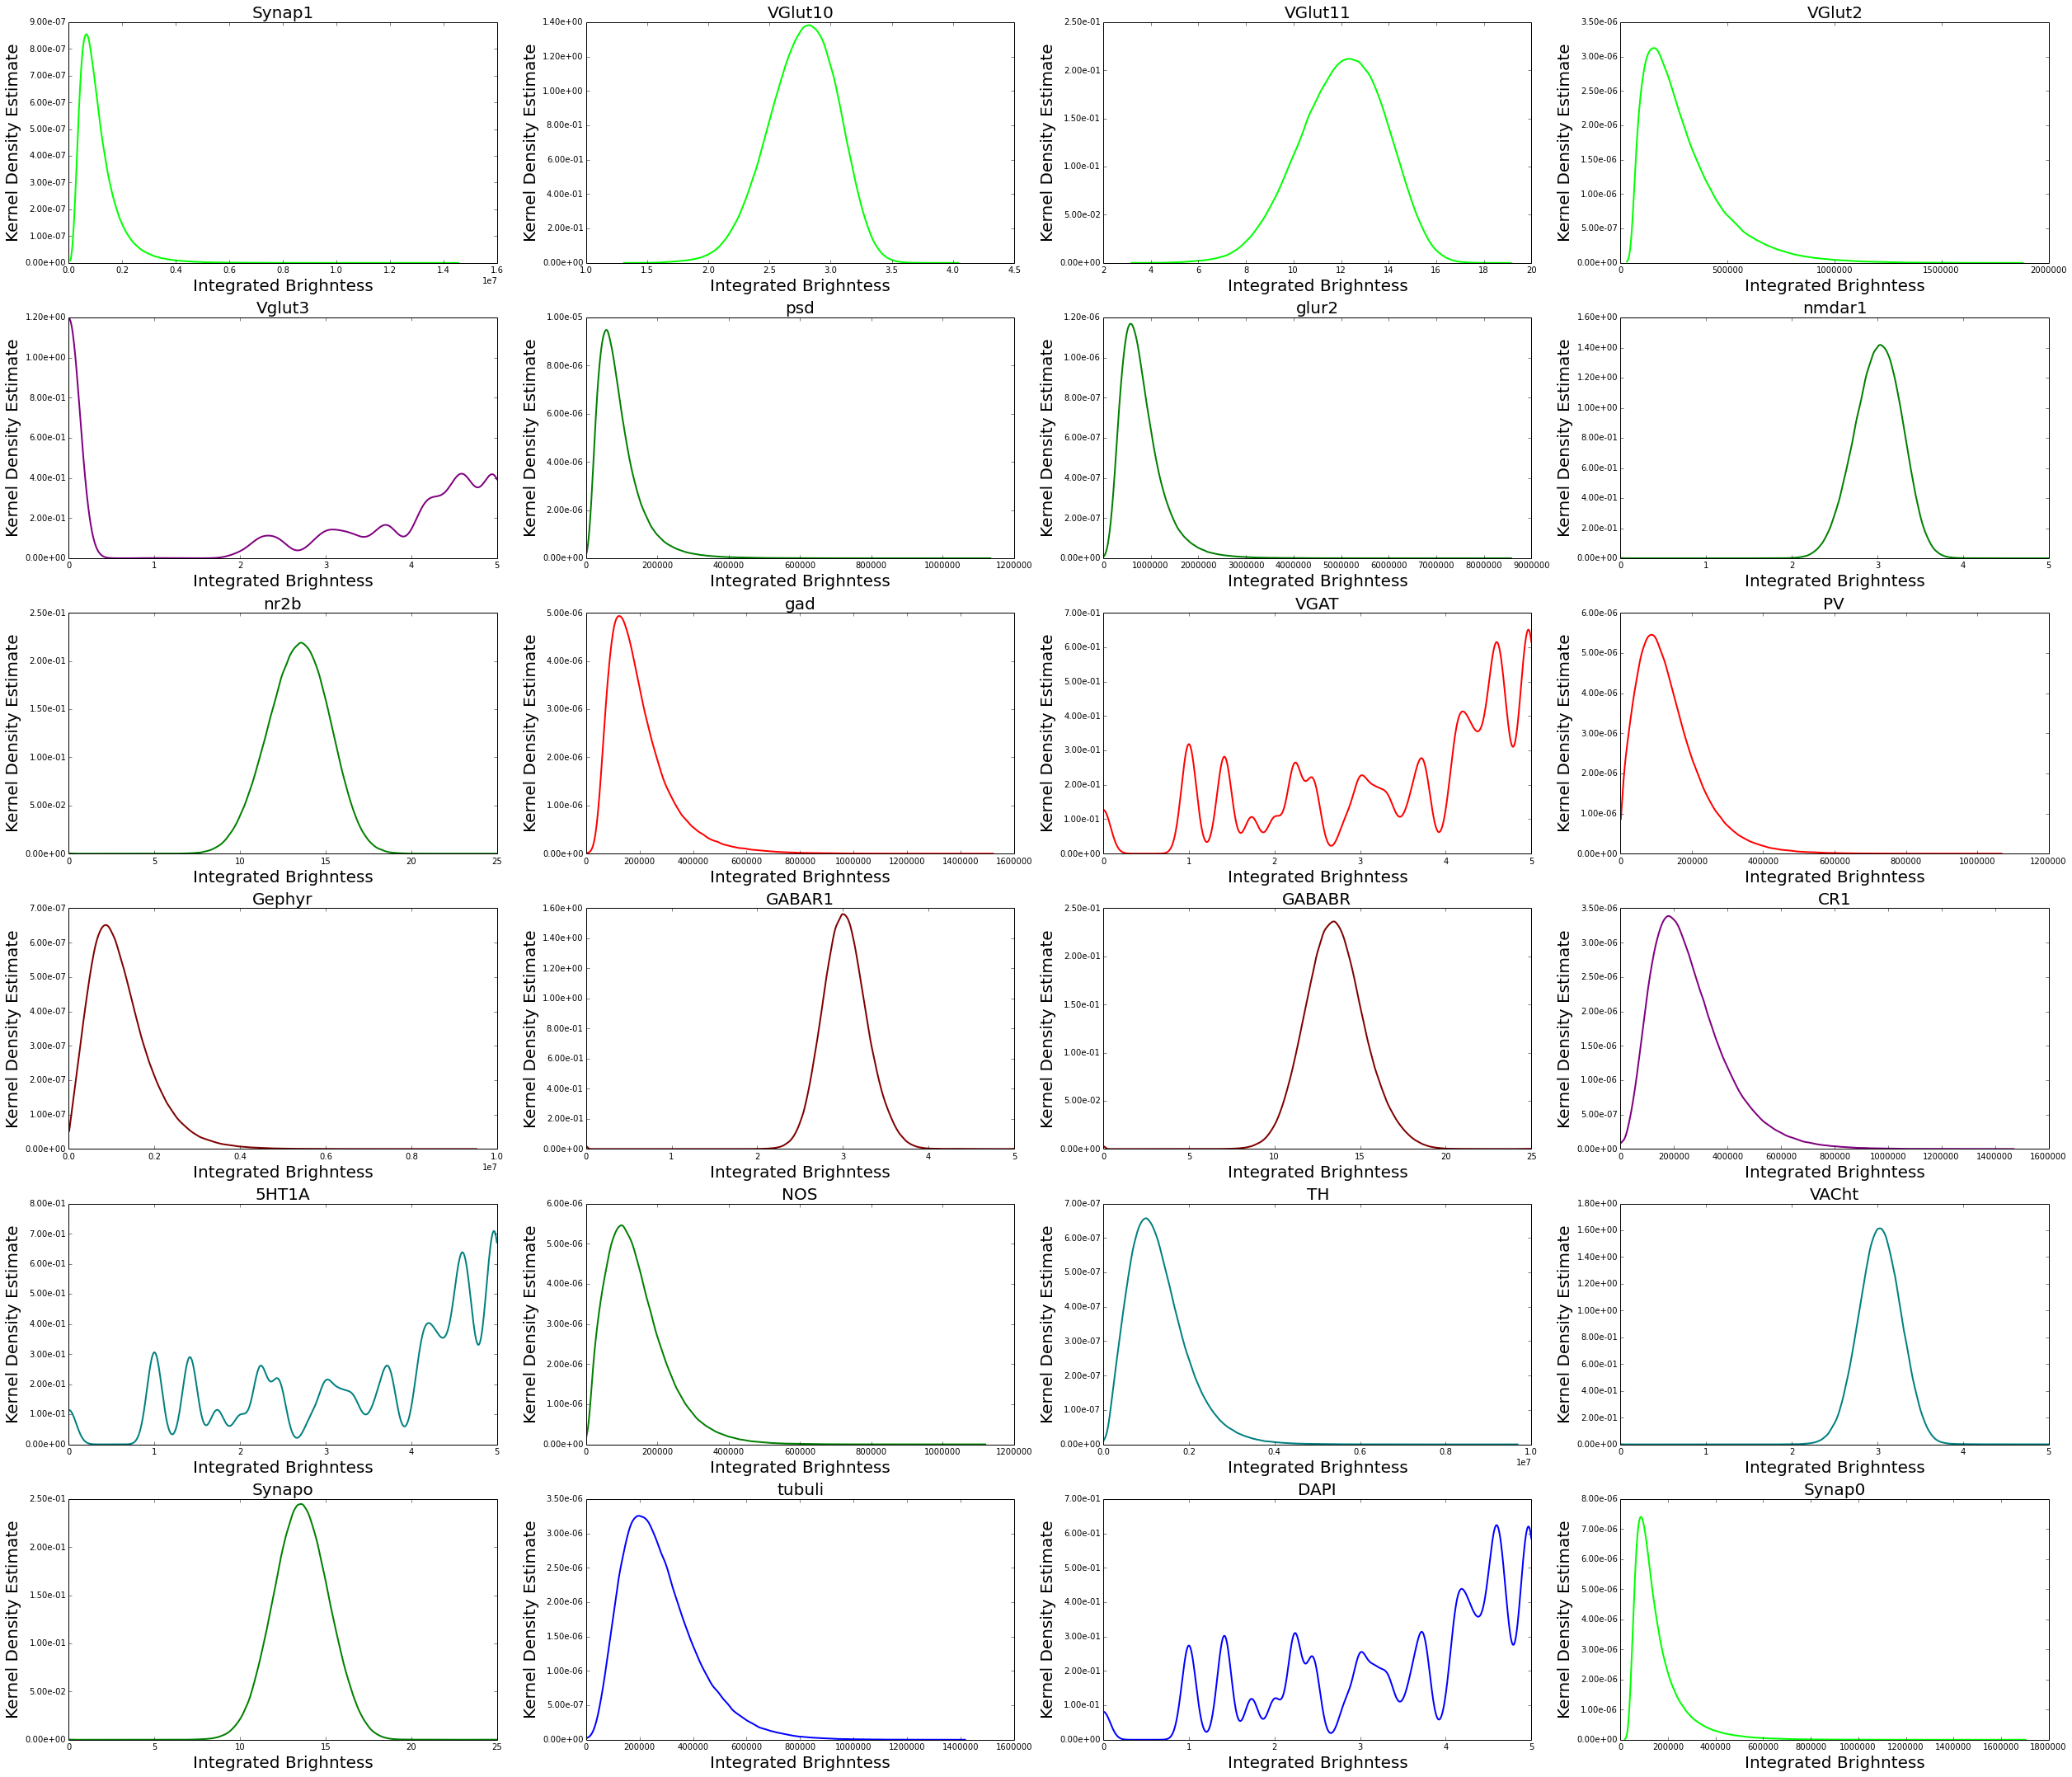

In [3]:
X = np.transpose(np.load('/Users/Tyler/synapse_data/synapse_f0_features.npy'))
mx = np.amax(X)
X_plot = {channel[r]: np.linspace(np.amin(x), np.amax(x), 1000) for r, x in enumerate(X)} 
channel2pdf = {channel[r]: stats.gaussian_kde(x).evaluate(X_plot[channel[r]]) for r, x in enumerate(X)}
type2color = {'ex_pre': '#00FF00', 'ex_post': '#008000', 'in_pre': '#FF0000', 'in_post': '#800000', 'in_pre_small':\
              '#800080', 'other': '#008080', 'none': '#0000FF'}
fig = plt.figure(figsize=(35,30))
for i, ch in enumerate(channel):
    ax = plt.subplot(6,4,i)
    line = plt.plot(X_plot[ch][1:], channel2pdf[ch][1:], color=type2color[channel2type[ch]], linewidth=2)
    plt.xlabel('Integrated Brighntess', fontsize=20)
    plt.ylabel('Kernel Density Estimate', fontsize=20)
    plt.title(ch, fontsize=20)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.tight_layout()

log data

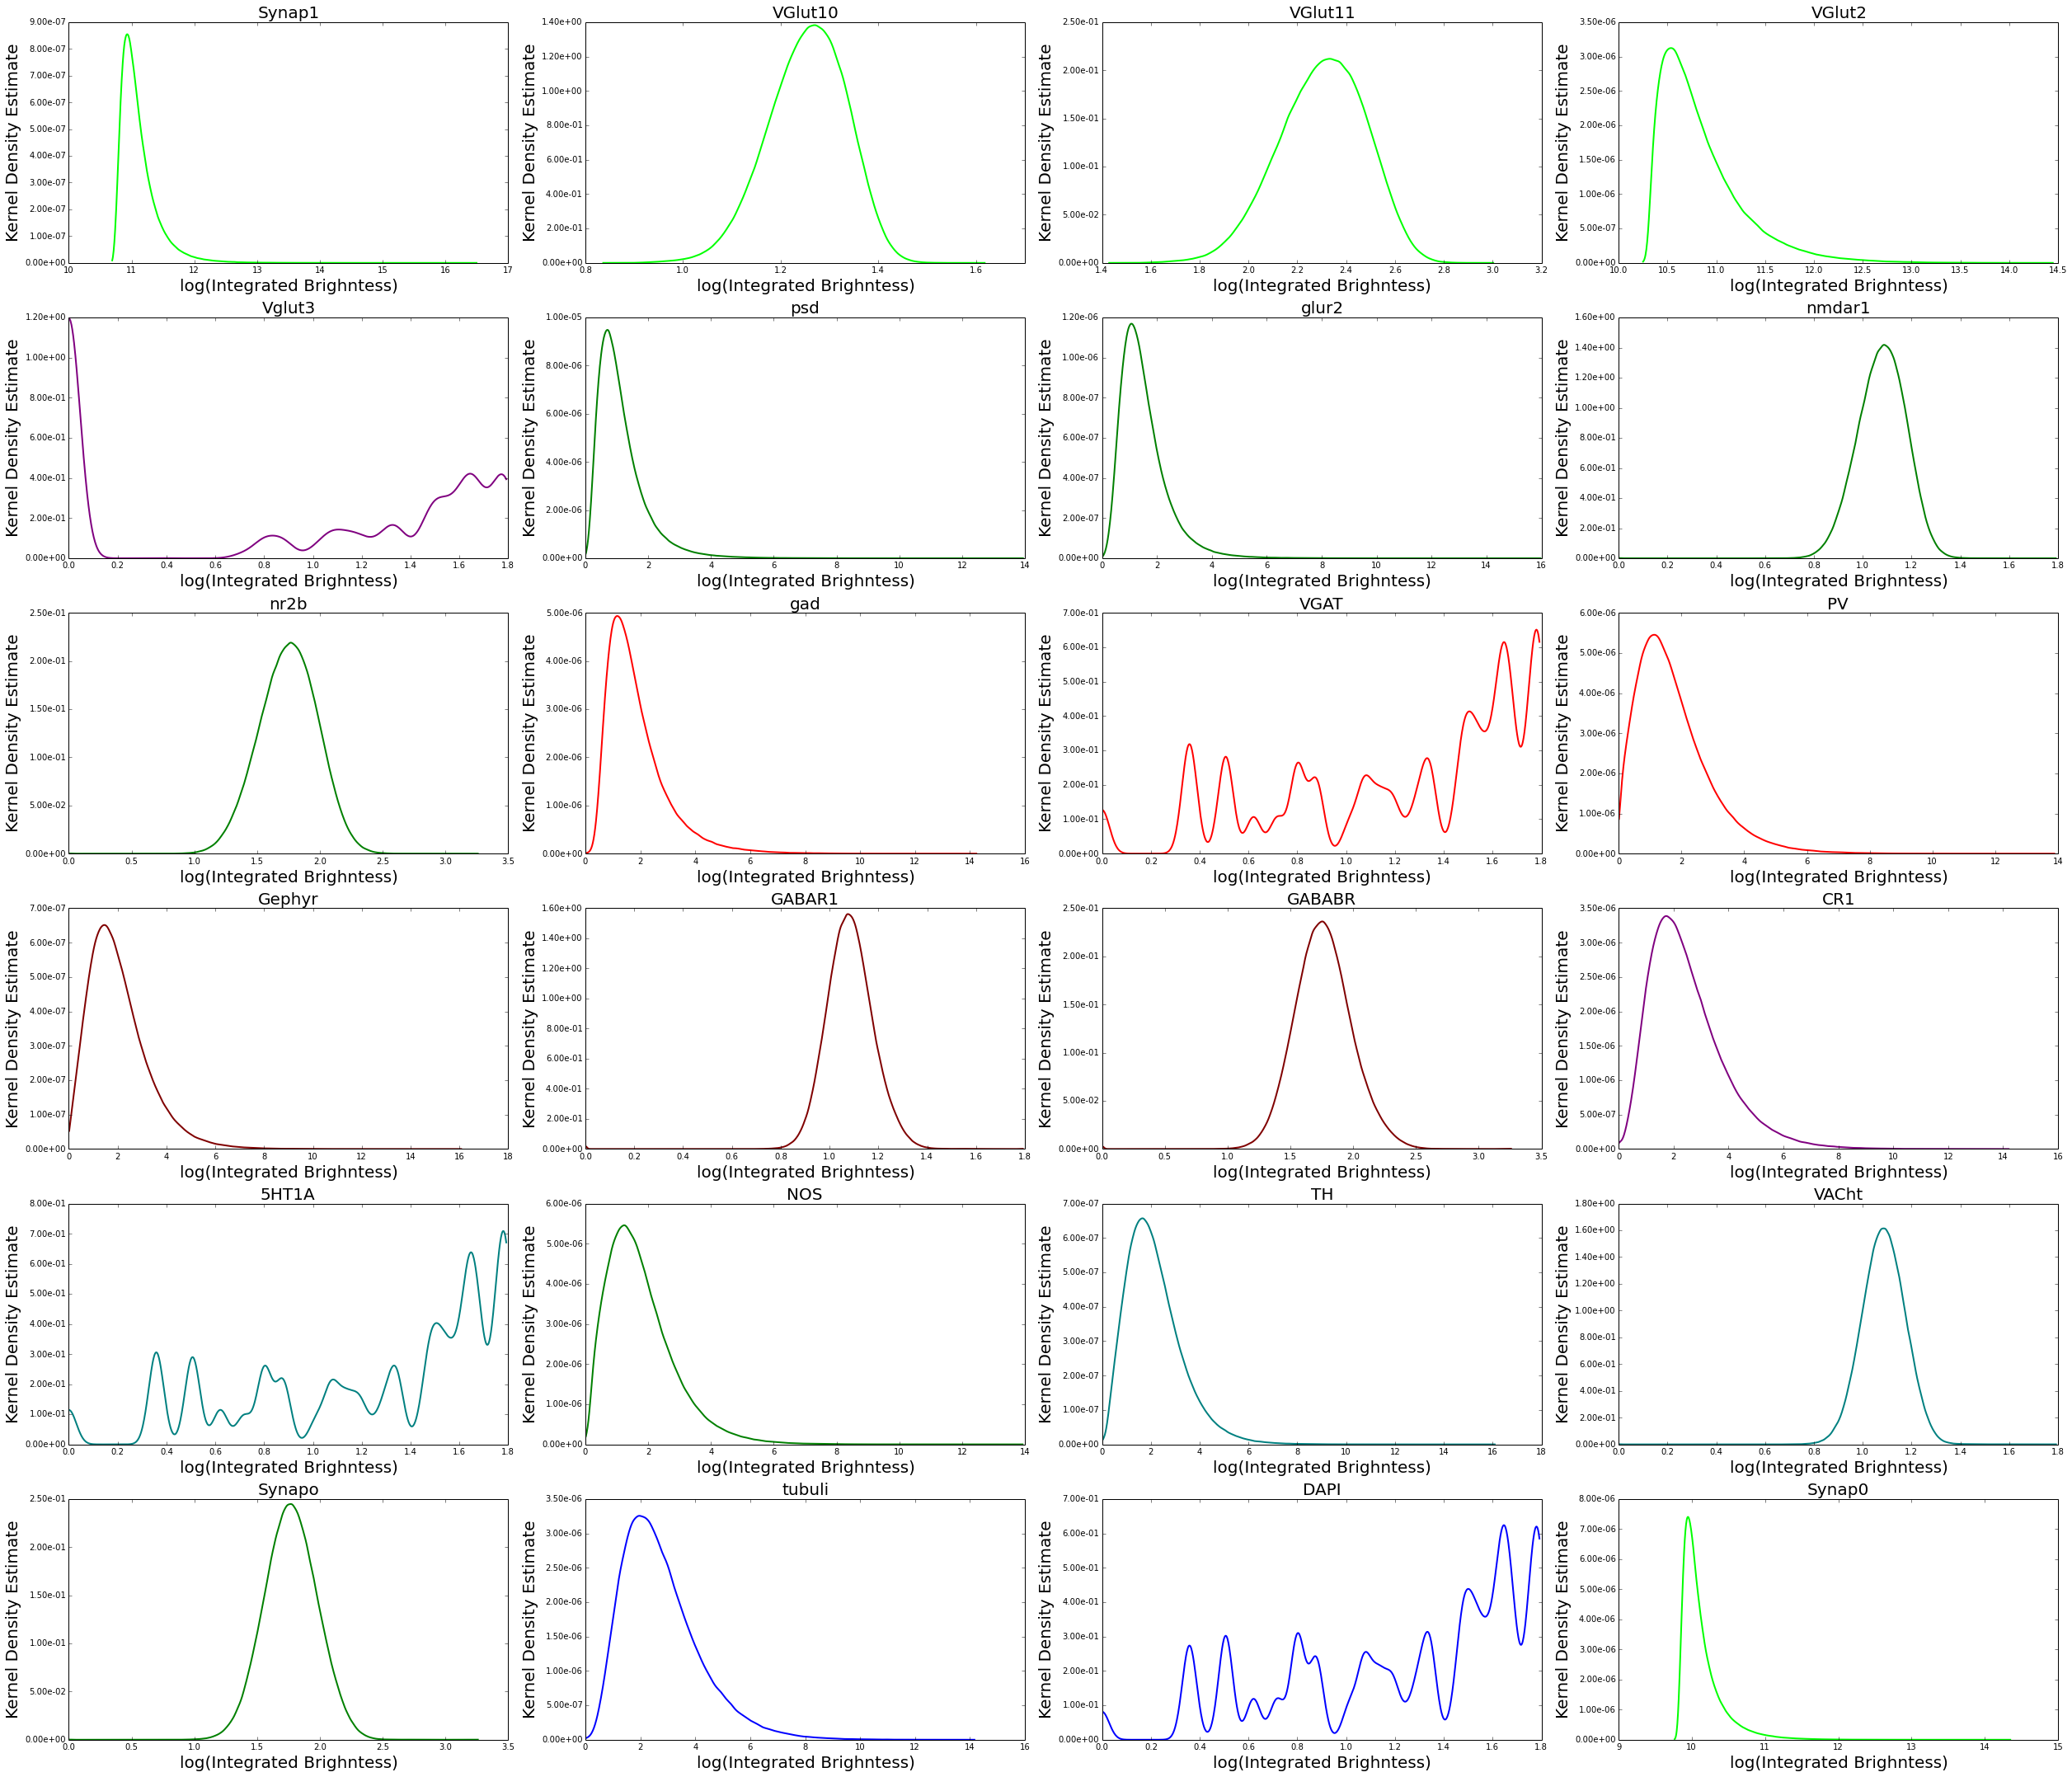

In [4]:
X = np.transpose(np.load('/Users/Tyler/synapse_data/synapse_f0_features_log.npy'))
mx = np.amax(X)
X_plot = {channel[r]: np.linspace(np.amin(x), np.amax(x), 1000) for r, x in enumerate(X)} 

type2color = {'ex_pre': '#00FF00', 'ex_post': '#008000', 'in_pre': '#FF0000', 'in_post': '#800000', 'in_pre_small':\
              '#800080', 'other': '#008080', 'none': '#0000FF'}
plt.figure(figsize=(35,30))
for i, ch in enumerate(channel):
    ax = plt.subplot(6,4,i)
    line = plt.plot(X_plot[ch][1:], channel2pdf[ch][1:], color=type2color[channel2type[ch]], linewidth=2)
    plt.xlabel('log(Integrated Brighntess)', fontsize=20)
    plt.ylabel('Kernel Density Estimate', fontsize=20)
    plt.title(ch, fontsize=20)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.tight_layout()

log-normalized data

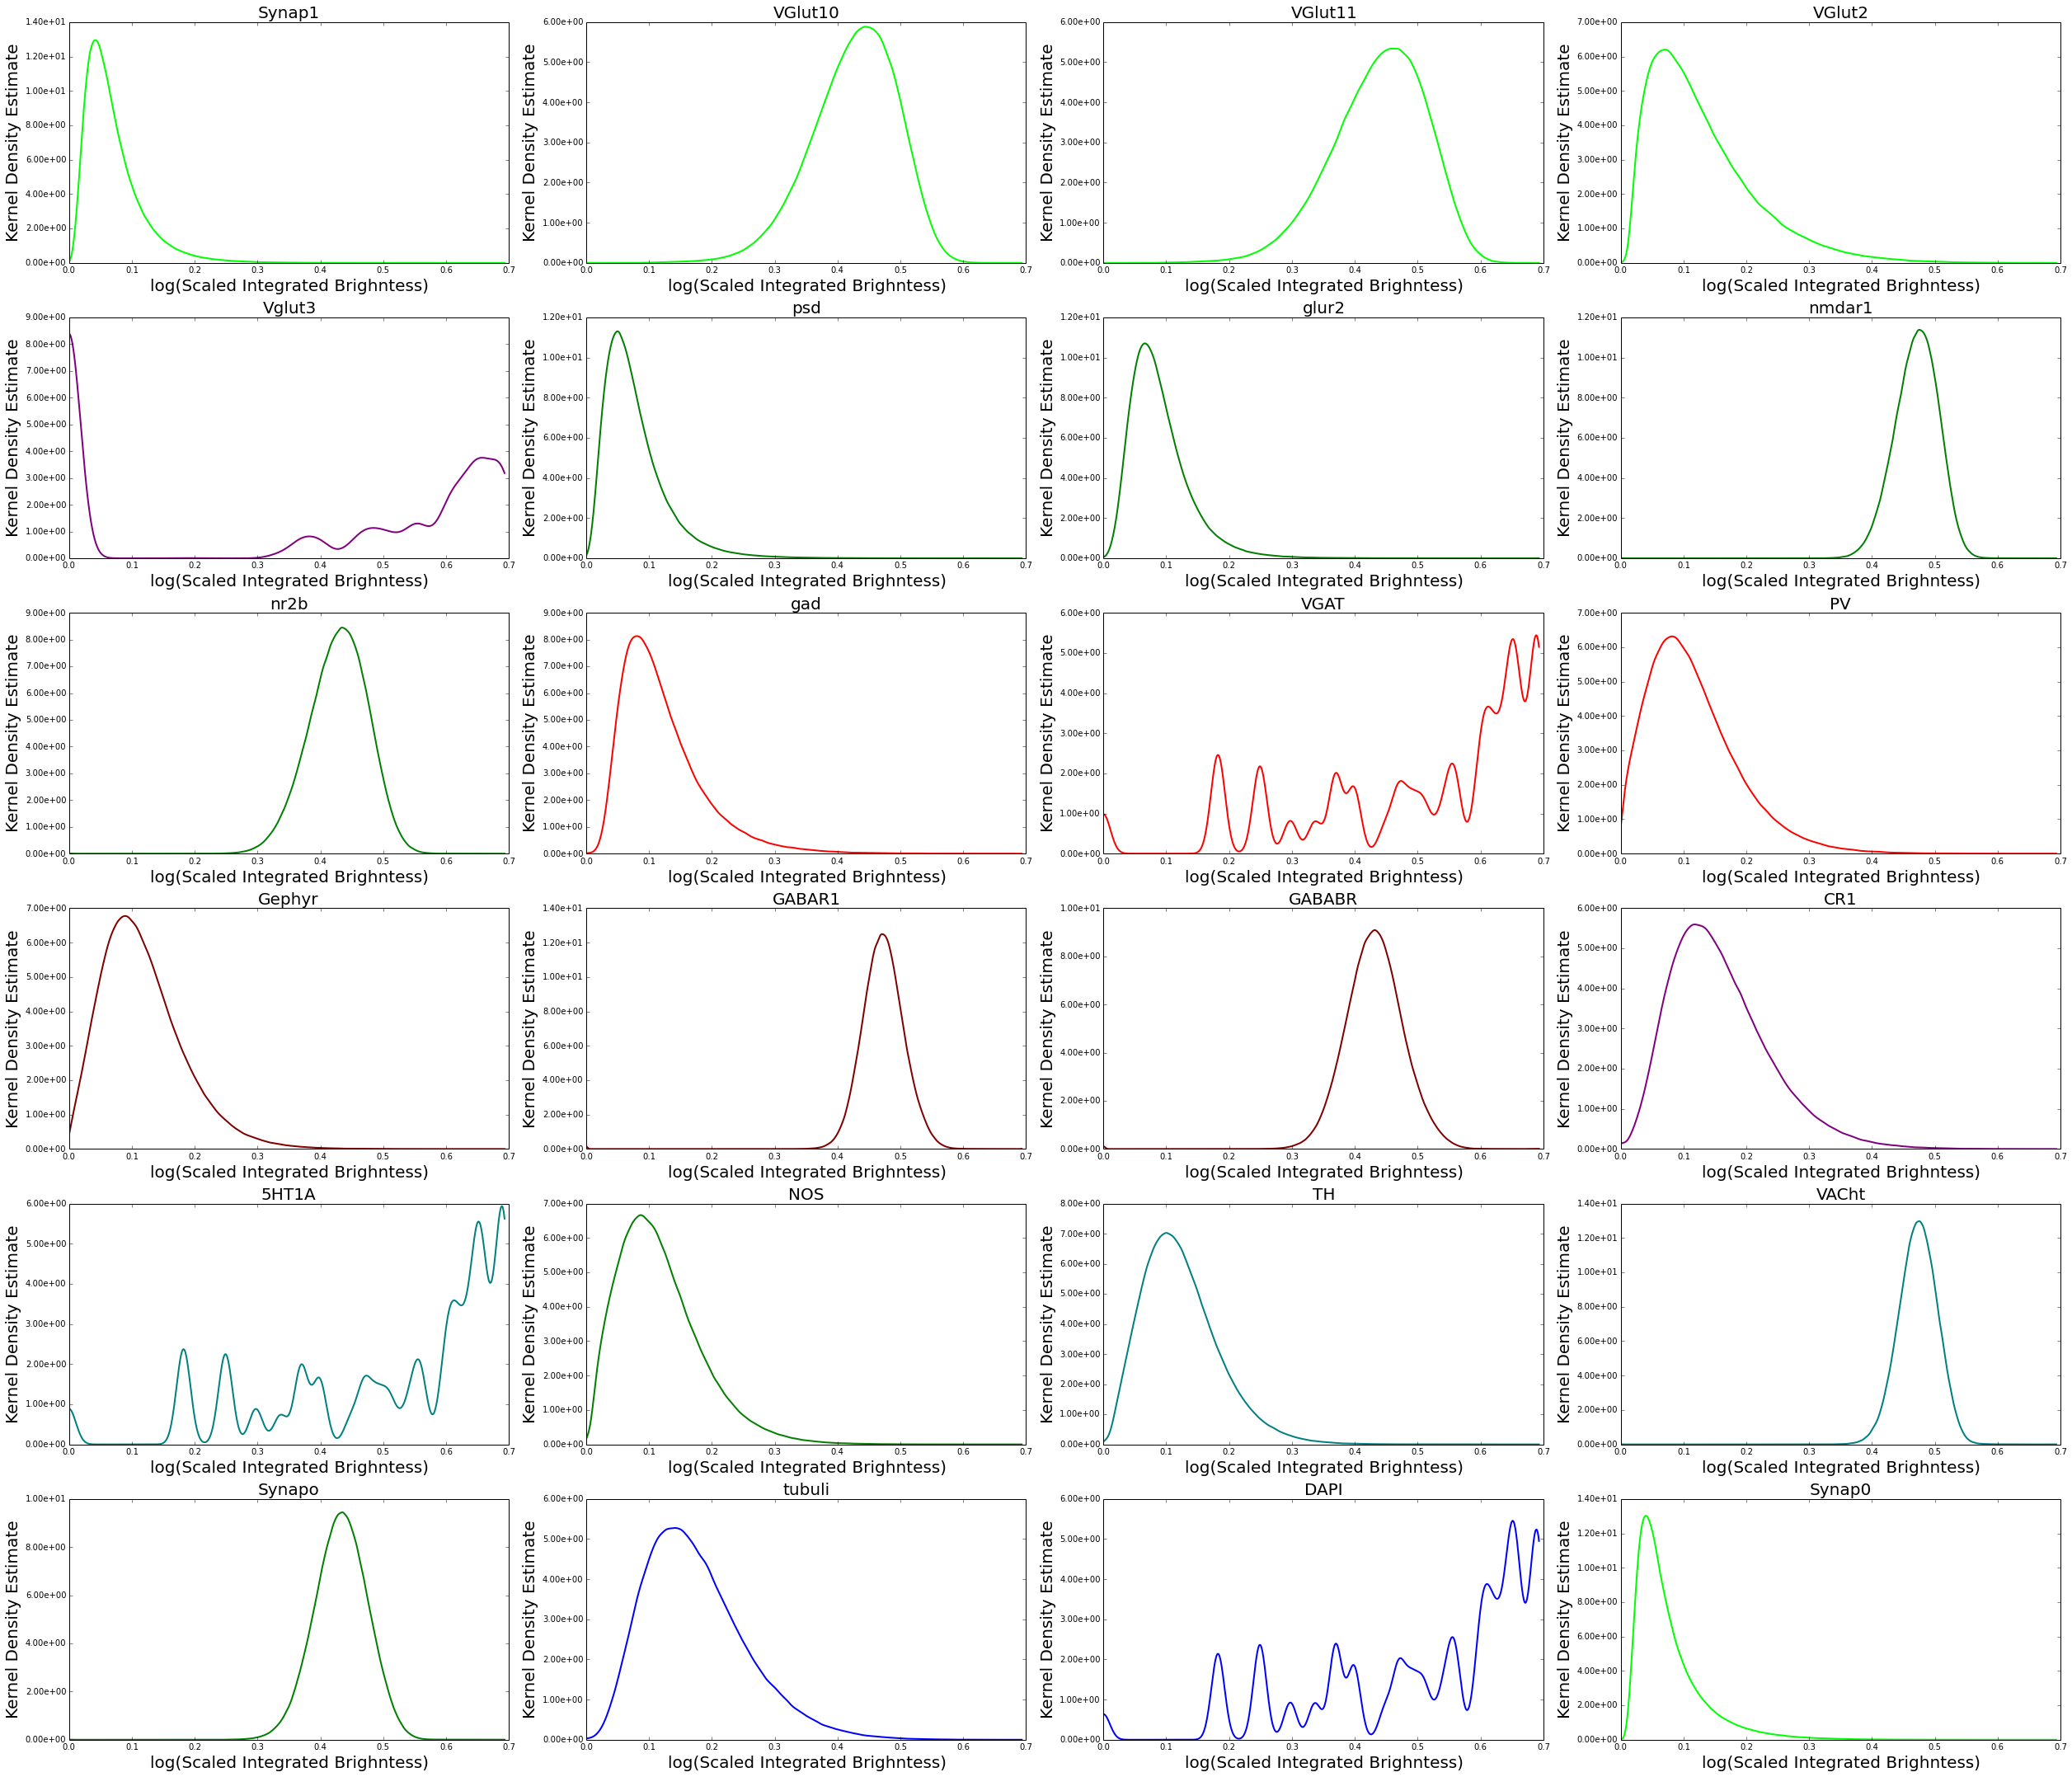

In [5]:
X = np.transpose(np.load('/Users/Tyler/synapse_data/synapse_f0_features_log_normalized.npy'))
mx = np.amax(X)
X_plot = {channel[r]: np.linspace(np.amin(x), np.amax(x), 1000) for r, x in enumerate(X)} 
channel2pdf = {channel[r]: stats.gaussian_kde(x).evaluate(X_plot[channel[r]]) for r, x in enumerate(X)}
type2color = {'ex_pre': '#00FF00', 'ex_post': '#008000', 'in_pre': '#FF0000', 'in_post': '#800000', 'in_pre_small':\
              '#800080', 'other': '#008080', 'none': '#0000FF'}
plt.figure(figsize=(35,30))
for i, ch in enumerate(channel):
    ax = plt.subplot(6,4,i)
    line = plt.plot(X_plot[ch][1:], channel2pdf[ch][1:], color=type2color[channel2type[ch]], linewidth=2)
    plt.xlabel('log(Scaled Integrated Brighntess)', fontsize=20)
    plt.ylabel('Kernel Density Estimate', fontsize=20)
    plt.title(ch, fontsize=20)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.tight_layout()

square root data

In [ ]:
X = np.transpose(np.load('/Users/Tyler/synapse_data/synapse_f0_features_sqrt.npy'))
mx = np.amax(X)
X_plot = {channel[r]: np.linspace(np.amin(x), np.amax(x), 1000) for r, x in enumerate(X)} 
channel2pdf = {channel[r]: stats.gaussian_kde(x).evaluate(X_plot[channel[r]]) for r, x in enumerate(X)}
type2color = {'ex_pre': '#00FF00', 'ex_post': '#008000', 'in_pre': '#FF0000', 'in_post': '#800000', 'in_pre_small':\
              '#800080', 'other': '#008080', 'none': '#0000FF'}

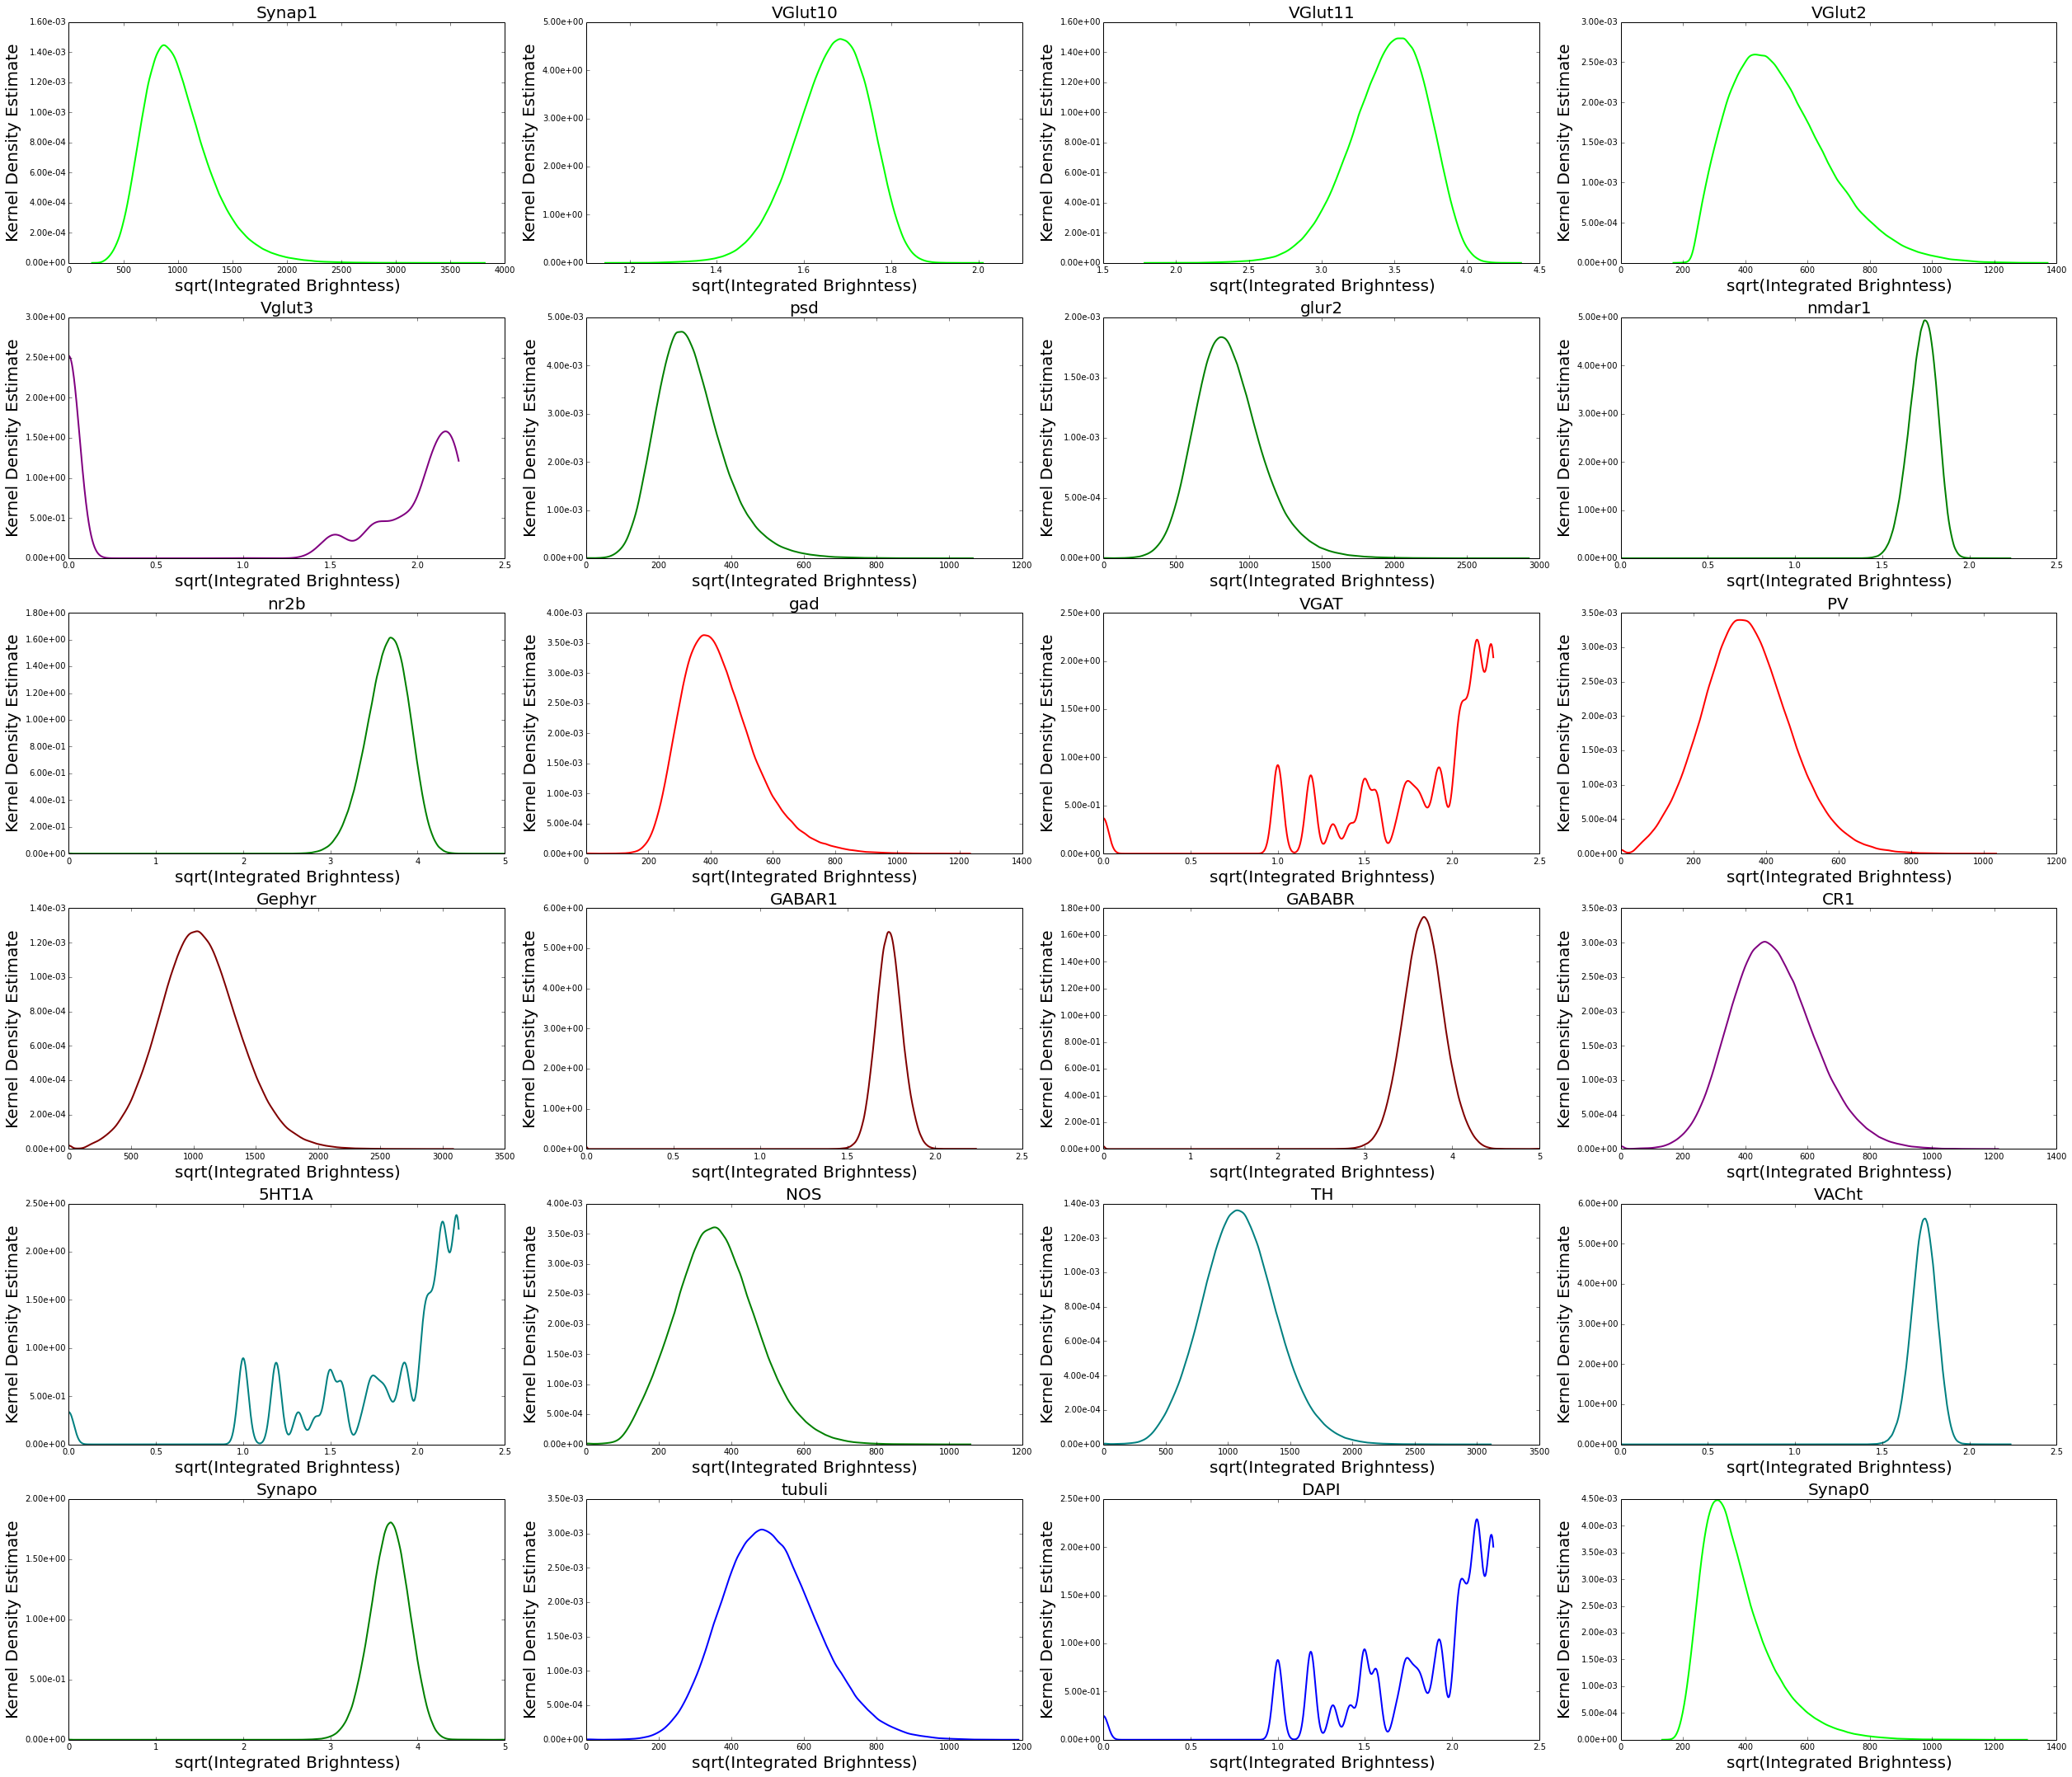

In [11]:
plt.figure(figsize=(35,30))
for i, ch in enumerate(channel):
    ax = plt.subplot(6,4,i)
    line = plt.plot(X_plot[ch][1:], channel2pdf[ch][1:], color=type2color[channel2type[ch]], linewidth=2)
    plt.xlabel('sqrt(Integrated Brighntess)', fontsize=20)
    plt.ylabel('Kernel Density Estimate', fontsize=20)
    plt.title(ch, fontsize=20)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.tight_layout()

square root normalized data

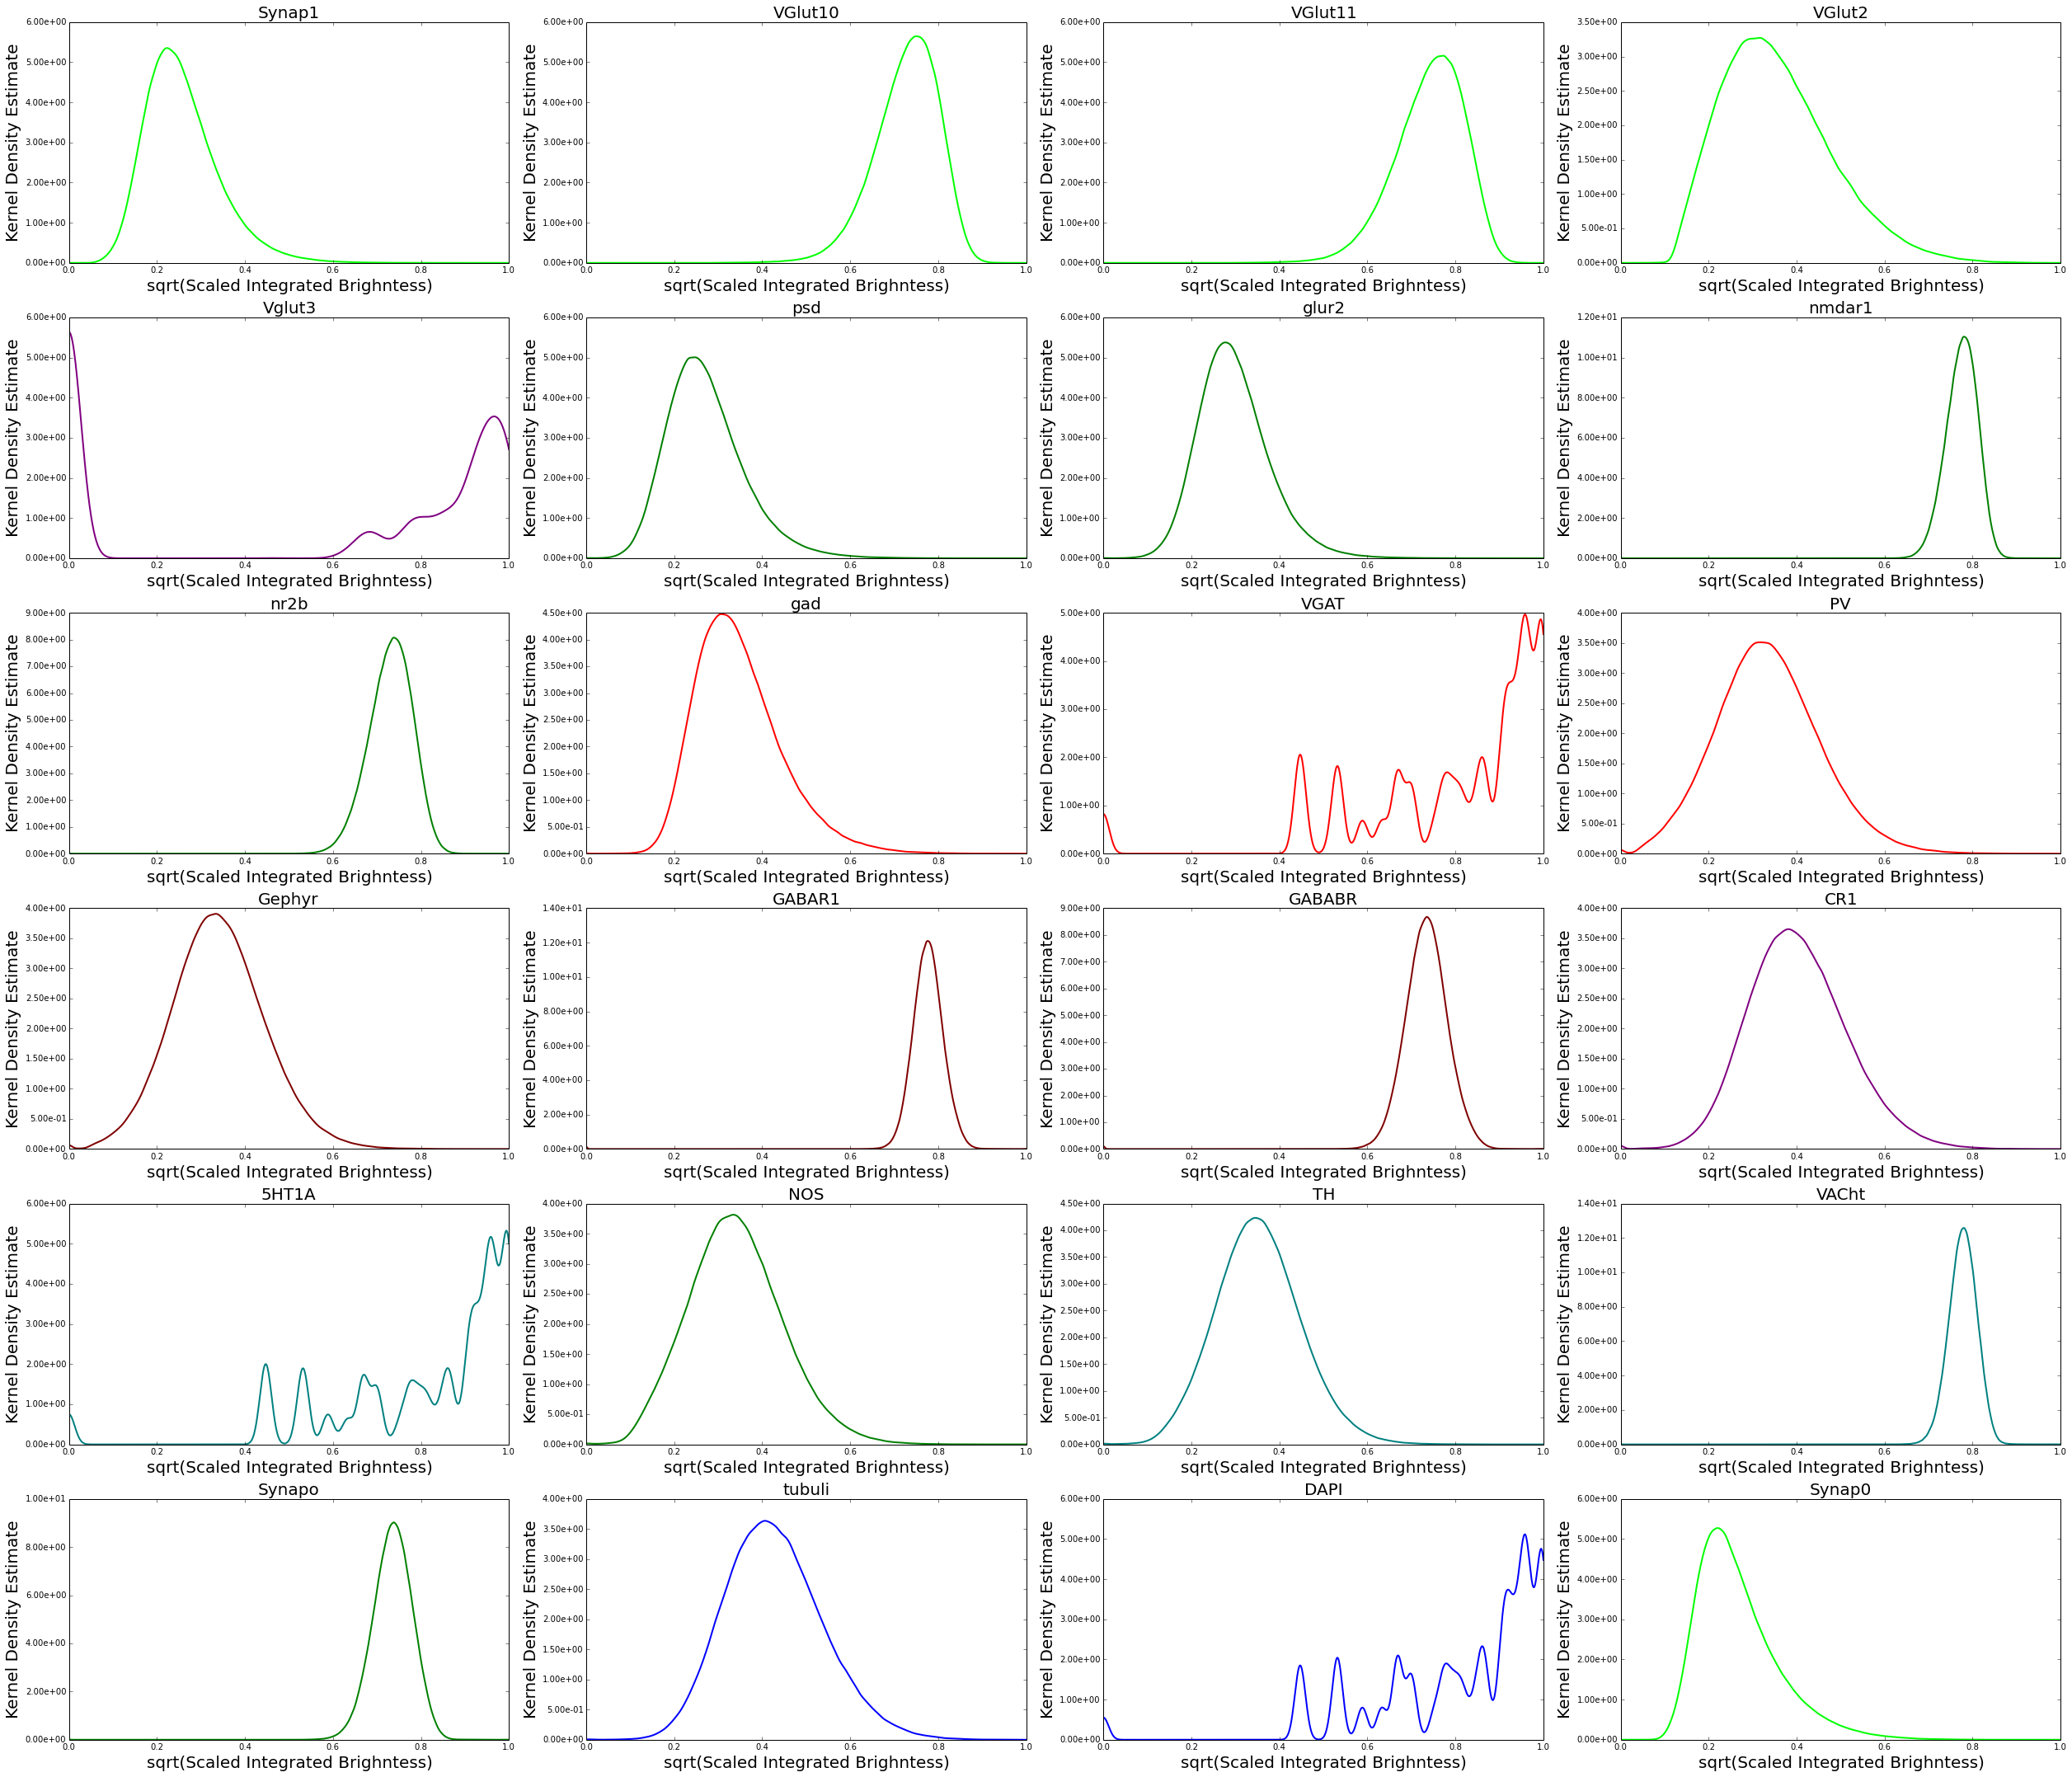

In [8]:
X = np.transpose(np.load('/Users/Tyler/synapse_data/synapse_f0_features_sqrt_normalized.npy'))
mx = np.amax(X)
X_plot = {channel[r]: np.linspace(np.amin(x), np.amax(x), 1000) for r, x in enumerate(X)} 
channel2pdf = {channel[r]: stats.gaussian_kde(x).evaluate(X_plot[channel[r]]) for r, x in enumerate(X)}
type2color = {'ex_pre': '#00FF00', 'ex_post': '#008000', 'in_pre': '#FF0000', 'in_post': '#800000', 'in_pre_small':\
              '#800080', 'other': '#008080', 'none': '#0000FF'}
plt.figure(figsize=(35,30))
for i, ch in enumerate(channel):
    ax = plt.subplot(6,4,i)
    line = plt.plot(X_plot[ch][1:], channel2pdf[ch][1:], color=type2color[channel2type[ch]], linewidth=2)
    plt.xlabel('sqrt(Scaled Integrated Brighntess)', fontsize=20)
    plt.ylabel('Kernel Density Estimate', fontsize=20)
    plt.title(ch, fontsize=20)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.tight_layout()

## Pairwise scatter plots for scaled-log-transformed integrated brightness

In [ ]:
X = np.load('/Users/Tyler/synapse_data/synapse_f0_features_log_normalized.npy')
np.random.seed(1)
np.random.shuffle(X)
X = X[0:int(1e5),:]
n,nchannels = X.shape
c = list(combinations(range(nchannels), 2))
for i, pair in enumerate(c):
    slope, intercept, r_value, p_value, std_err  = stats.linregress(X[:, pair[0]], X[:, pair[1]])
    plt.figure(i)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], hold=True, alpha = 0.5)
    xlow = np.min(X[:, pair[0]])
    xhi = np.max(X[:, pair[0]])
    ylow = slope*xlow + intercept
    yhi = slope*xhi + intercept
    plt.plot([xlow, xhi], [ylow, yhi], color='red')
    plt.axes().set_aspect('equal', 'datalim')
    plt.xlabel(channel[pair[0]])
    plt.ylabel(channel[pair[1]])
    if i == 0:
        plt.title('Integrated Brightness\n' + 'r^2 = ' + str(r_value**2))
    else:
        plt.title('r^2 = ' + str(r_value**2))
    plt.show()

## Pairwise scatter plots for untransformed integrated brightness

In [ ]:
X = np.load('/Users/Tyler/synapse_data/synapse_f0_features.npy')
np.random.seed(1)
np.random.shuffle(X)
X = X[0:int(1e5),:]
n,nchannels = X.shape
c = list(combinations(range(nchannels), 2))
for i, pair in enumerate(c):
    slope, intercept, r_value, p_value, std_err  = stats.linregress(X[:, pair[0]], X[:, pair[1]])
    plt.figure(i)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], hold=True, alpha = 0.5)
    xlow = np.min(X[:, pair[0]])
    xhi = np.max(X[:, pair[0]])
    ylow = slope*xlow + intercept
    yhi = slope*xhi + intercept
    plt.plot([xlow, xhi], [ylow, yhi], color='red')
    plt.axes().set_aspect('equal', 'datalim')
    plt.xlabel(channel[pair[0]])
    plt.ylabel(channel[pair[1]])
    if i == 0:
        plt.title('Integrated Brightness\n' + 'r^2 = ' + str(r_value**2))
    else:
        plt.title('r^2 = ' + str(r_value**2))
    plt.show()

## Pairwise scatter plots for log-transformed integrated brightness

In [ ]:
X = np.load('/Users/Tyler/synapse_data/synapse_f0_features_log.npy')
np.random.seed(1)
np.random.shuffle(X)
X = X[0:int(1e5),:]
n,nchannels = X.shape
c = list(combinations(range(nchannels), 2))
for i, pair in enumerate(c):
    slope, intercept, r_value, p_value, std_err  = stats.linregress(X[:, pair[0]], X[:, pair[1]])
    plt.figure(i)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], hold=True, alpha = 0.5)
    xlow = np.min(X[:, pair[0]])
    xhi = np.max(X[:, pair[0]])
    ylow = slope*xlow + intercept
    yhi = slope*xhi + intercept
    plt.plot([xlow, xhi], [ylow, yhi], color='red')
    plt.axes().set_aspect('equal', 'datalim')
    plt.xlabel(channel[pair[0]])
    plt.ylabel(channel[pair[1]])
    if i == 0:
        plt.title('Integrated Brightness\n' + 'r^2 = ' + str(r_value**2))
    else:
        plt.title('r^2 = ' + str(r_value**2))
    plt.show()